# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import chart_studio.plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack,vstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.preprocessing import Normalizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pdb
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest,f_classif
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.externals.six import StringIO
from IPython.display import Image
from wordcloud import WordCloud
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN
import pydotplus

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1.1 Reading Data

In [0]:
Project_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train_data.csv')
Resource_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/resources.csv')
print(Project_data.shape)
print(Resource_data.shape)

(109248, 17)
(1541272, 4)


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(Project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
Project_data['Date'] = pd.to_datetime(Project_data['project_submitted_datetime'])
Project_data.drop('project_submitted_datetime', axis=1, inplace=True)
Project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
Project_data = Project_data[cols]
Project_data.head(2)

Unnamed: 0  ... project_is_approved
55660        8393  ...                   1
76127       37728  ...                   1

[2 rows x 17 columns]

<h1>2. Clustering </h1>

<font color='red'>**Only 10K Data Points were used for this assignment.**</font>

<h2>2.1 Splitting data

In [0]:
Y = Project_data['project_is_approved'].values
Project_data.drop(['project_is_approved'], axis=1, inplace=True)
lpd = len(Project_data)
ys = np.zeros(lpd, dtype=np.int32)
X = Project_data

In [0]:
#Spliting the Dataset into three Train and Test
X_DB, X_Test, Y, Y_Test = train_test_split(X, Y, test_size=0.90, random_state=0, stratify=ys)

#print('Shape of the X_Train data is {0} and Y_Train data is: {1}'.format(X_DB.shape))

In [0]:
#Y = Project_data['project_is_approved'].values
#Project_data.drop(['project_is_approved'], axis=1, inplace=True)
#X_DB = Project_data
print(f"Shape of DataFrame:{X_DB.shape}")

Shape of DataFrame:(10924, 16)


## 1.2 preprocessing of `project_subject_categories`

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
catogories_train = list(X_DB['project_subject_categories'].values)
cat_list = []
for i in catogories_train:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_DB['clean_categories'] = cat_list
X_DB.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_DB['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict_train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

print(len(sorted_cat_dict_train))

9


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_catogories_train = list(X_DB['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories_train:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_DB['clean_subcategories'] = sub_cat_list
X_DB.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_DB['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

print(len(sorted_sub_cat_dict_train))


30


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
X_DB["essay"] = X_DB["project_essay_1"].map(str) +\
                        X_DB["project_essay_2"].map(str) + \
                        X_DB["project_essay_3"].map(str) + \
                        X_DB["project_essay_4"].map(str)



In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

preprocessed_essays_train = []


for sentance in tqdm(X_DB['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

print(f"Shape of preprocessed_essays after preprocessing: {len(preprocessed_essays_train)}")


100%|██████████| 10924/10924 [00:06<00:00, 1675.12it/s]

Shape of preprocessed_essays after preprocessing: 10924


In [0]:
word_count_essay_train = []
for a in tqdm(X_DB["essay"]) :
    b = len(a.split())
    word_count_essay_train.append(b)

X_DB["word_count_essay_train"] = word_count_essay_train



100%|██████████| 10924/10924 [00:00<00:00, 60467.81it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_DB['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_train.append(sent.lower().strip())




print(f"Shape of preprocessed_titles after preprocessing: {len(preprocessed_titles_train)}")


100%|██████████| 10924/10924 [00:00<00:00, 37927.40it/s]

Shape of preprocessed_titles after preprocessing: 10924


In [0]:
word_count_title_train = []
for a in tqdm(X_DB["project_title"]) :
    b = len(a.split())
    word_count_title_train.append(b)

X_DB["word_count_title_train"] = word_count_title_train



100%|██████████| 10924/10924 [00:00<00:00, 479544.69it/s]


<h2>Make Data Model Ready: encoding numerical, categorical features</h2>

## 1.5 Preparing data for models

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict_train.keys()), lowercase=False, binary=True)
vectorizer_cat.fit(X_DB['clean_categories'].values)
categories_one_hot_train = vectorizer_cat.transform(X_DB['clean_categories'].values)

print(vectorizer_cat.get_feature_names())
print(f"Shape of categories_one_hot matrix after one hot encodig: {categories_one_hot_train.shape}")


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of categories_one_hot matrix after one hot encodig: (10924, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict_train.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer_sub_cat.fit_transform(X_DB['clean_subcategories'].values)

print(vectorizer_sub_cat.get_feature_names())
print(f"Shape of sub_categories_one_hot matrix after one hot encodig: {sub_categories_one_hot_train.shape}")


['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'ESL', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of sub_categories_one_hot matrix after one hot encodig: (10924, 30)


**School State**

In [0]:
sch1_catogories = list(X_DB['school_state'].values)
school_list = []
for sent in sch1_catogories:
    school_list.append(sent.lower().strip())
X_DB['school_categories'] = school_list
X_DB.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_sch = Counter()
for word in X_DB['school_categories'].values:
    my_counter_sch.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sch_dict = dict(my_counter_sch)
sorted_sch_dict = dict(sorted(sch_dict.items(), key=lambda kv: kv[1]))

vectorizer_sch = CountVectorizer(vocabulary=list(sorted_sch_dict.keys()), lowercase=False, binary=True)
vectorizer_sch.fit(X_DB['school_categories'].values)
#print(vectorizer.get_feature_names())

sch_one_hot_train = vectorizer_sch.transform(X_DB['school_categories'].values)
print(f"Shape of sch_one_hot matrix after one hot encodig: {sch_one_hot_train.shape}")



Shape of sch_one_hot matrix after one hot encodig: (10924, 51)


**Prefix**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
prefix_catogories_train = list(X_DB['teacher_prefix'].values)
prefix_list_train = []
for sent in prefix_catogories_train:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_train.append(sent.lower().strip())
X_DB['prefix_catogories'] = prefix_list_train
X_DB.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_train = Counter()
for word in X_DB['prefix_catogories'].values:
    my_counter_prefix_train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_train = dict(my_counter_prefix_train)
sorted_prefix_dict_train = dict(sorted(prefix_dict_train.items(), key=lambda kv: kv[1]))

vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_prefix_dict_train.keys()), lowercase=False, binary=True)
vectorizer_prefix.fit(X_DB['prefix_catogories'].values)
#print(vectorizer.get_feature_names())

prefix_one_hot_train = vectorizer_prefix.transform(X_DB['prefix_catogories'].values)
print(f"Shape of prefix_one_hot matrix after one hot encodig:{prefix_one_hot_train.shape}")


Shape of prefix_one_hot matrix after one hot encodig:(10924, 4)


**project_grade_category**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grade_catogories_train = list(X_DB['project_grade_category'].values)
grade_list_train = []
for sent in grade_catogories_train:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_train.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_DB['new_grade_category'] = grade_list_train
X_DB.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_train = Counter()
for word in X_DB['new_grade_category'].values:
    my_counter_grade_train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_train = dict(my_counter_grade_train)
sorted_grade_dict_train = dict(sorted(grade_dict_train.items(), key=lambda kv: kv[1]))


vectorizer_grade = CountVectorizer(vocabulary=list(sorted_grade_dict_train.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_DB['new_grade_category'].values)


grade_one_hot_train = vectorizer_grade.transform(X_DB['new_grade_category'].values)
print(f"Shape of grade_one_hot matrix after one hot encodig: {grade_one_hot_train.shape}")

Shape of grade_one_hot matrix after one hot encodig: (10924, 4)


### 1.5.2 Make Data Model Ready: Vectorizing Numerical features

**Price and Quantity data**

In [0]:
price_data = Resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_DB = pd.merge(X_DB, price_data, on='id', how='left')

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_DB['price'].values.reshape(1,-1))

price_norm.transform(X_DB['price'].values.reshape(1,-1))

price_norm_train = (X_DB['price'].values.reshape(-1,1))

print(f"Shape of price_norm matrix after one hot encodig:{price_norm_train.shape} ")


Shape of price_norm matrix after one hot encodig:(10924, 1) 


In [0]:
quantity_norm = Normalizer(norm='l2', copy=False)
quantity_norm.fit(X_DB['quantity'].values.reshape(1,-1))

quantity_norm_train = quantity_norm.transform(X_DB['quantity'].values.reshape(1,-1))

quantity_norm_train = (X_DB['quantity'].values.reshape(-1,1))

print(f"Shape of quantity_norm matrix after one hot encodig: {price_norm_train.shape}")

Shape of quantity_norm matrix after one hot encodig: (10924, 1)


**teacher_number_of_previously_posted_projects**

In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_DB['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_train = teacher_prev_post_norm.transform(X_DB['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_train = (X_DB['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(f"Shape of teacher_prev_post_norm matrix after one hot encodig: {teacher_prev_post_norm_train.shape}")


Shape of teacher_prev_post_norm matrix after one hot encodig: (10924, 1)


**Title word count**

In [0]:
title_norm = Normalizer(norm='l2', copy=False)
title_norm.fit(X_DB['word_count_title_train'].values.reshape(1,-1))
word_count_title_train = title_norm.transform(X_DB['word_count_title_train'].values.reshape(1,-1))

word_count_title_train = (X_DB['word_count_title_train'].values.reshape(-1,1))

print(f"Shape of tile word count: {word_count_title_train.shape}")


Shape of tile word count: (10924, 1)


**Essay word count**

In [0]:
essay_norm = Normalizer(norm='l2', copy=False)
essay_norm.fit(X_DB['word_count_essay_train'].values.reshape(1,-1))
word_count_essay_train = essay_norm.transform(X_DB['word_count_essay_train'].values.reshape(1,-1))

word_count_essay_train = (X_DB['word_count_essay_train'].values.reshape(-1,1))

print(f"Shape of tile word count: {word_count_essay_train.shape}")

Shape of tile word count: (10924, 1)


**Sentiment Scores**

In [0]:
# https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
sid = SentimentIntensityAnalyzer()
essays = X_DB['essay']

sentiment_pos_essay_Train = []
sentiment_neg_essay_Train = []
sentiment_neut_essay_Train = []
sentiment_com_essay_Train = []

for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    sentiment_pos_essay_Train.append(res['pos'])
    sentiment_neg_essay_Train.append(res['neg'])
    sentiment_neut_essay_Train.append(res['neu'])
    sentiment_com_essay_Train.append(res['compound'])
X_DB['sentiment_pos_essay_Train'] = sentiment_pos_essay_Train
X_DB['sentiment_neg_essay_Train'] = sentiment_neg_essay_Train
X_DB['sentiment_neut_essay_Train'] = sentiment_neut_essay_Train
X_DB['sentiment_com_essay_Train'] = sentiment_com_essay_Train


sentiment_norm_pos = Normalizer(norm='l2', copy=False)
sentiment_norm_neg = Normalizer(norm='l2', copy=False)
sentiment_norm_neut = Normalizer(norm='l2', copy=False)
sentiment_norm_com = Normalizer(norm='l2', copy=False)

sentiment_norm_pos.fit(X_DB['sentiment_pos_essay_Train'].values.reshape(1,-1))
sentiment_norm_neg.fit(X_DB['sentiment_neg_essay_Train'].values.reshape(1,-1))
sentiment_norm_neut.fit(X_DB['sentiment_neut_essay_Train'].values.reshape(1,-1))
sentiment_norm_com.fit(X_DB['sentiment_com_essay_Train'].values.reshape(1,-1))
                                                         
senti_pos_ess_Tr_norm = sentiment_norm_pos.transform(X_DB['sentiment_pos_essay_Train'].values.reshape(1,-1))
senti_pos_ess_Tr_norm = (X_DB['sentiment_pos_essay_Train'].values.reshape(-1,1))

senti_neg_ess_Tr_norm = sentiment_norm_neg.transform(X_DB['sentiment_neg_essay_Train'].values.reshape(1,-1))
senti_neg_ess_Tr_norm = (X_DB['sentiment_neg_essay_Train'].values.reshape(-1,1))

senti_neut_ess_Tr_norm = sentiment_norm_neut.transform(X_DB['sentiment_neut_essay_Train'].values.reshape(1,-1))
senti_neut_ess_Tr_norm = (X_DB['sentiment_neut_essay_Train'].values.reshape(-1,1))

senti_com_ess_Tr_norm = sentiment_norm_com.transform(X_DB['sentiment_com_essay_Train'].values.reshape(1,-1))
senti_com_ess_Tr_norm = (X_DB['sentiment_com_essay_Train'].values.reshape(-1,1))


print(f"Shape of senti_pos_ess_norm matrix after one hot encodig: {senti_pos_ess_Tr_norm.shape}")
print(f"Shape of senti_neg_ess_norm matrix after one hot encodig: {senti_neg_ess_Tr_norm.shape}")
print(f"Shape of senti_neut_ess_norm matrix after one hot encodig: {senti_neut_ess_Tr_norm.shape}")
print(f"Shape of senti_com_ess_norm matrix after one hot encodig: {senti_com_ess_Tr_norm.shape}")


100%|██████████| 10924/10924 [00:31<00:00, 350.63it/s]

Shape of senti_pos_ess_norm matrix after one hot encodig: (10924, 1)
Shape of senti_neg_ess_norm matrix after one hot encodig: (10924, 1)
Shape of senti_neut_ess_norm matrix after one hot encodig: (10924, 1)
Shape of senti_com_ess_norm matrix after one hot encodig: (10924, 1)


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

### 1.5.3 Vectorizing Text data

#### 1.5.2.2 TFIDF vectorizer

In [0]:
vectorizer_essays_tfidf = TfidfVectorizer(min_df=10,max_features=5000)
X_Tr_Es_DS = pd.DataFrame()
X_Tr_Es_DS['essay'] = preprocessed_essays_train
text_tfidf_train = vectorizer_essays_tfidf.fit_transform(preprocessed_essays_train)

print(f"Shape of matrix after one hot encodig: {text_tfidf_train.shape}")


Shape of matrix after one hot encodig: (10924, 5000)


**TFIDF vectorizer for Project Title**

In [0]:
vectorizer_titles_tfidf = TfidfVectorizer(min_df=10,max_features=5000)
X_Tr_Es_DS['title'] = preprocessed_titles_train
title_tfidf_train = vectorizer_titles_tfidf.fit_transform(preprocessed_titles_train)

print(f"Shape of matrix(title) after one hot encoding: {title_tfidf_train.shape}")


Shape of matrix(title) after one hot encoding: (10924, 719)


### 1.5.4 Merging all the above features

- we need to merge all the vectors i.e catogorical, text, numerical vectors

Merging vectorised Train data

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_TFIDF = hstack((categories_one_hot_train,sub_categories_one_hot_train,sch_one_hot_train,grade_one_hot_train,prefix_one_hot_train, text_tfidf_train,title_tfidf_train, price_norm_train, quantity_norm_train, teacher_prev_post_norm_train, word_count_essay_train, word_count_title_train, senti_pos_ess_Tr_norm,senti_neg_ess_Tr_norm,senti_neut_ess_Tr_norm,senti_com_ess_Tr_norm))
print(X_TFIDF.shape)
print(Y.shape)

(10924, 5826)
(10924,)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
# https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection
X_5K = SelectKBest(f_classif, k=5000).fit(X_TFIDF, Y)
X_5K_Feat = X_5K.transform(X_TFIDF)
print(X_5K_Feat.shape)

(10924, 5000)


<h2>2.5 Apply Kmeans</h2>

In [0]:
%%time
Cl_Pa=[2,3,5,7,10,15,20,25,30]
#Cl_Pa=[2,3,5,10,25,50,100,200]
obj_loss = []
for i in Cl_Pa:
  kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1).fit(X_5K_Feat)
  obj_loss.append(kmeans.inertia_)

CPU times: user 863 ms, sys: 190 ms, total: 1.05 s
Wall time: 2h 18min 15s


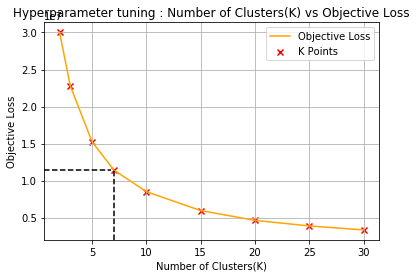

CPU times: user 251 ms, sys: 109 ms, total: 360 ms
Wall time: 244 ms


In [0]:
%%time
# Performance of model on data for each hyper parameter.
plt.close()
plt.scatter(Cl_Pa, obj_loss, label='K Points', c='R', marker='x',linewidths=10)
plt.plot(Cl_Pa, obj_loss, label='Objective Loss',c='orange')
plt.gca()
plt.legend()
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Objective Loss")
plt.axhline(y=11427327.719192185, xmin=0, xmax=0.20, ls='--',c='black')
plt.axvline(x=7, ymin=0, ymax=0.32, ls='--', c='black')
plt.title("Hyperparameter tuning : Number of Clusters(K) vs Objective Loss")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'><br>
From the above cuver the elbow cuvre is observed at the point 7(i.e., Mimimal loss is observed at the point 7). 

In [0]:
print(obj_loss)

[30033558.480239507, 22743714.98888698, 15238809.151488597, 11427327.719192185, 8505771.10573888, 5951907.020625975, 4630288.970696932, 3878395.516553365, 3342512.3022119165]


Word Cloud for Cluster:1


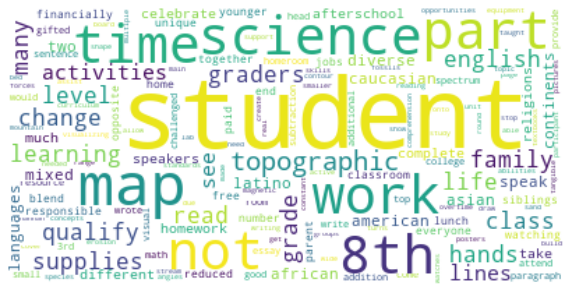

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:2


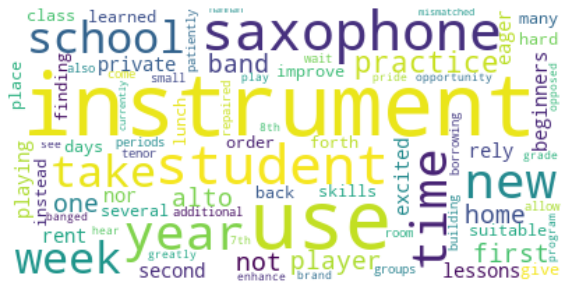

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:3


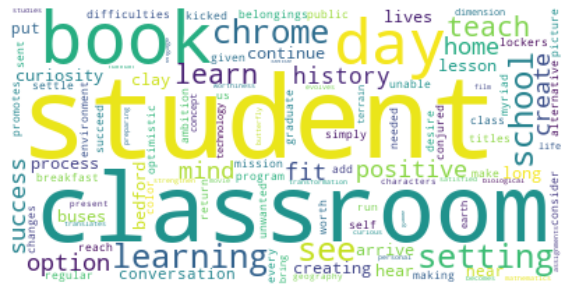

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:4


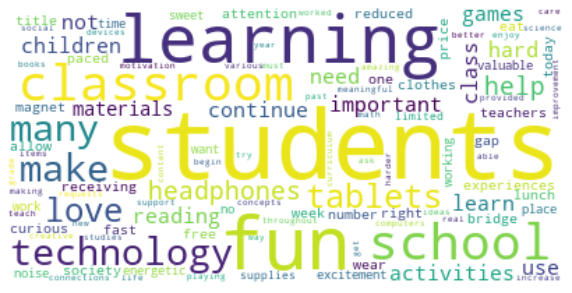

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:5


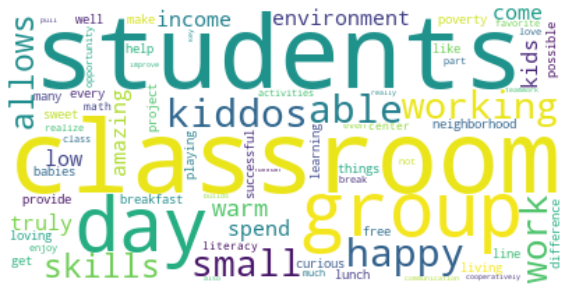

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:6


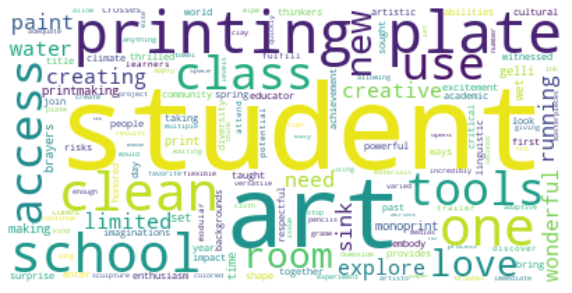

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:7


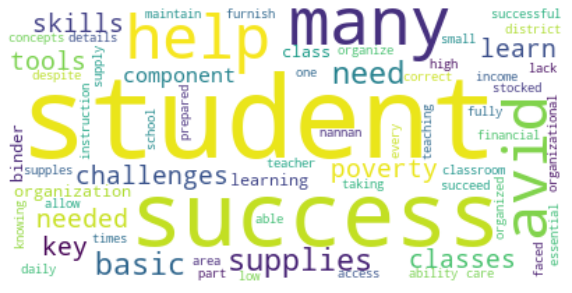

------------------------------------------------------------------------------------------------------------------------
CPU times: user 3.9 s, sys: 204 ms, total: 4.1 s
Wall time: 14min 30s


In [0]:
%%time
k_opt=7
kmeans_opt = KMeans(n_clusters=k_opt, random_state=0, n_jobs=-1).fit(X_5K_Feat)

def Cluster_Seperation(lbl,i_val):
  c = []
  c.append(essays[i])
  return c

essays = X_Tr_Es_DS['essay'].values
Clstr=[]
for j in range(k_opt):
  for i in range(kmeans_opt.labels_.shape[0]):
    if kmeans_opt.labels_[i] == j:
      clstr_val=Cluster_Seperation(kmeans_opt.labels_,i)
      Clstr.append(Clstr)
      if(i == j):
        break;
  words=''
  for i in clstr_val:
    words+=str(i)
  print(f"Word Cloud for Cluster:{j+1}")
  wordcloud = WordCloud(background_color="white",stopwords = stopwords,min_font_size = 5,random_state=0,repeat=False).generate(words)
  # Display the generated image:
  plt.close()
  plt.figure(figsize = (10, 10), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("--"*60)  

<h2>2.6 Apply AgglomerativeClustering</h2>

CPU times: user 5min 34s, sys: 1.06 s, total: 5min 35s
Wall time: 5min 36s


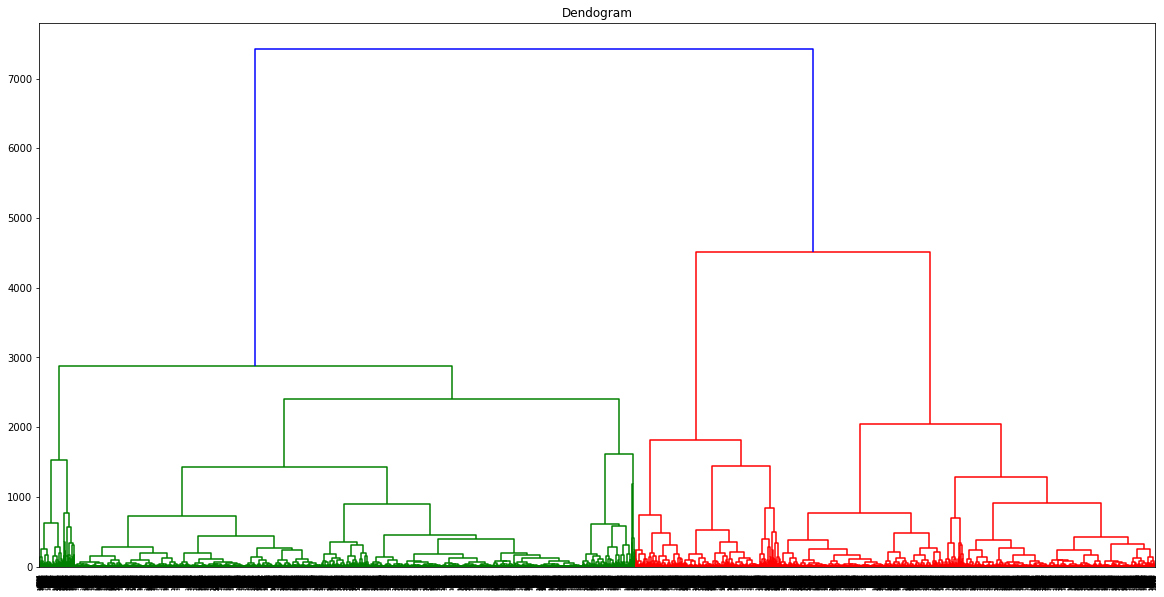

In [0]:
%%time
#agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit(X_5K_Feat.todense())

plt.figure(figsize=(20, 10))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_5K_Feat.todense(), method='ward'))  

Word Cloud for Cluster:1


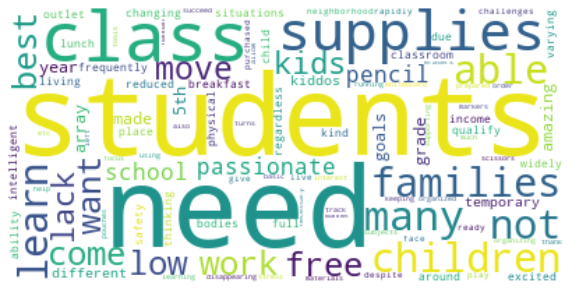

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:2


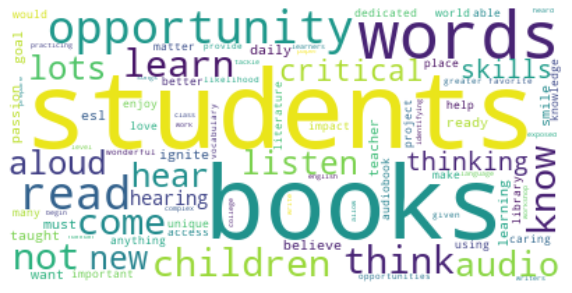

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:3


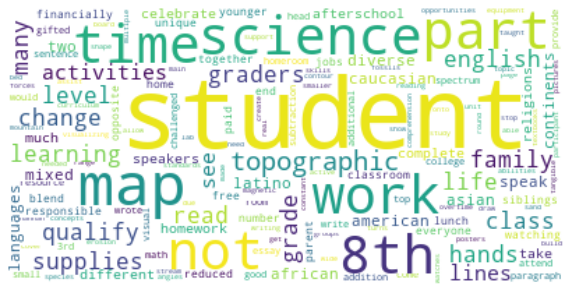

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:4


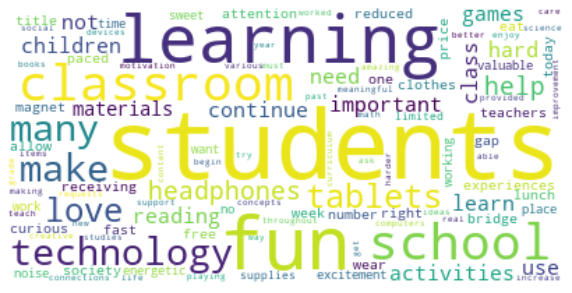

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:5


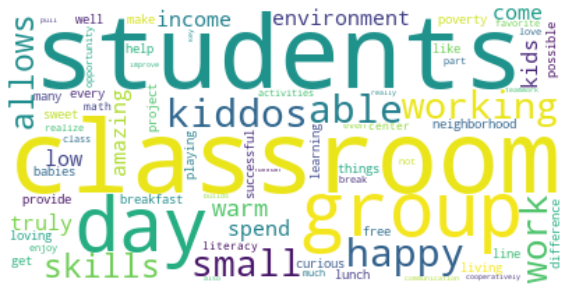

------------------------------------------------------------------------------------------------------------------------


In [0]:
a_opt=5
agg_opt = AgglomerativeClustering(n_clusters=a_opt, affinity='euclidean', linkage='ward').fit(X_5K_Feat.todense())

def Cluster_Seperation(lbl,i_val):
  c = []
  c.append(essays[i])
  return c

essays = X_Tr_Es_DS['essay'].values
Clstr=[]
for j in range(a_opt):
  for i in range(agg_opt.labels_.shape[0]):
    if agg_opt.labels_[i] == j:
      clstr_val=Cluster_Seperation(agg_opt.labels_,i)
      Clstr.append(Clstr)
      if(i == j):
        break;
  words=''
  for i in clstr_val:
    words+=str(i)

  print(f"Word Cloud for Cluster:{j+1}")
  wordcloud = WordCloud(background_color="white",stopwords = stopwords,min_font_size = 5,random_state=0,repeat=False).generate(words)
  # Display the generated image:
  plt.close()
  plt.figure(figsize = (10, 10), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("--"*60)  


<h2>2.7 Apply DBSCAN</h2>

In [0]:
print(X_5K_Feat.ndim)

2


In [0]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html
X_5K_Feat_DM=X_5K_Feat.todense()
minPts = 4
tree = KDTree(X_5K_Feat_DM)
idx = 0
mp_dist=[]
D_shape = X_5K_Feat_DM.shape[0]
for i in tqdm(range(D_shape)):
    dist, ind = tree.query(X_5K_Feat_DM[i], k=minPts)
    mp_dist.append(max(dist[0]))
mp_dist.sort()
print(mp_dist)

100%|██████████| 10924/10924 [00:58<00:00, 187.79it/s]

[2.465322974317046, 2.550809884020539, 2.552345991776758, 2.7086959560641577, 2.7086959560641577, 2.7164598667480324, 2.7333113195085077, 2.7403099116427048, 2.7403099116427048, 2.750833990346734, 2.7574054911281145, 2.7578016061299393, 2.8520554761707406, 2.866040259224589, 2.87856156540004, 2.8886168099787306, 2.891923908911903, 2.8933854129883936, 2.9042208740925988, 2.908061586223559, 2.9095649076227894, 2.910143625020814, 2.9137470188318697, 2.915651130183133, 2.934352395120333, 2.940741055441202, 2.945014409662869, 2.9475506399301237, 2.952588094154977, 2.956085704597775, 2.9617094940439266, 2.9668559346012495, 2.9683774310919966, 2.9708075016232365, 2.981037804287126, 2.989187067374367, 2.9899742963688456, 2.9994126369550718, 3.0055911186505644, 3.005758261249982, 3.0074718400641154, 3.008591680843875, 3.0116679110181437, 3.015471375035629, 3.0221908490127194, 3.0226590699984013, 3.0255967957373446, 3.032170758021093, 3.03537722891191, 3.043366686801599, 3.0463925530750102, 3.04

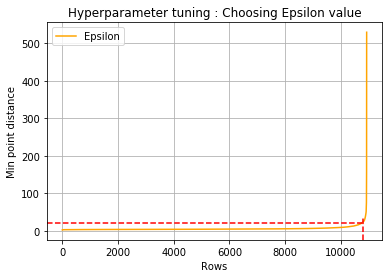

CPU times: user 254 ms, sys: 101 ms, total: 355 ms
Wall time: 242 ms


In [0]:
%%time
Cl_Pa=range(D_shape)

# Performance of model on data for each hyper parameter.
plt.close()
plt.plot(Cl_Pa, mp_dist, label='Epsilon',c='orange')
plt.gca()
plt.legend()
plt.xlabel("Rows")
plt.ylabel("Min point distance")
plt.title("Hyperparameter tuning : Choosing Epsilon value")
plt.axhline(y=20, xmin=0, xmax=0.94, ls='--',c='red')
plt.axvline(x=10780, ymin=0, ymax=0.1, ls='--', c='red')
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'><br>
From the above graph we can see that sharp drop at value 20.<br>Hence Epsilon value is choosen as 20.

Word Cloud for Cluster:1


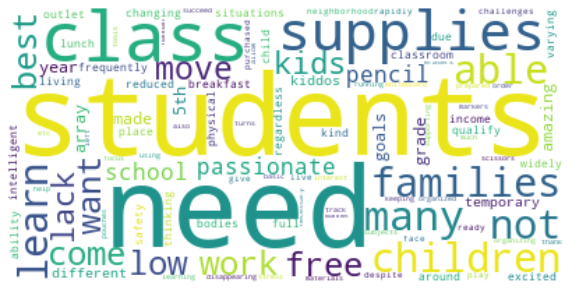

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:2


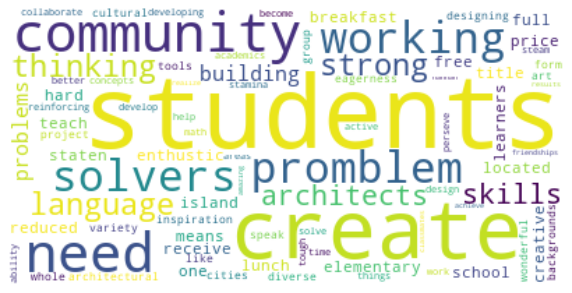

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:3


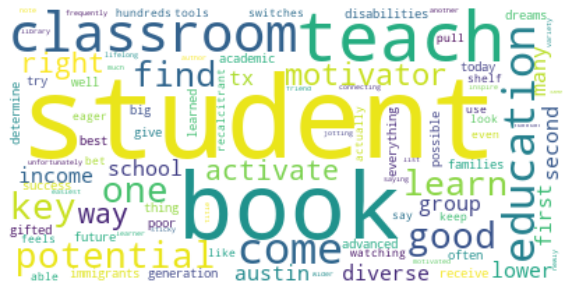

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:4


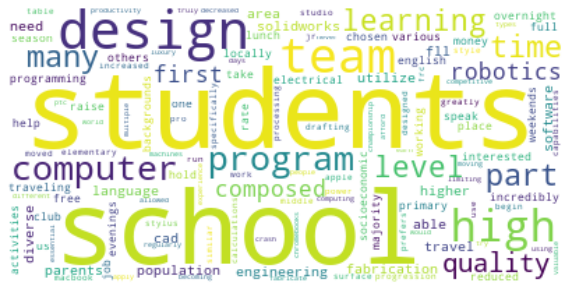

------------------------------------------------------------------------------------------------------------------------
Word Cloud for Cluster:5


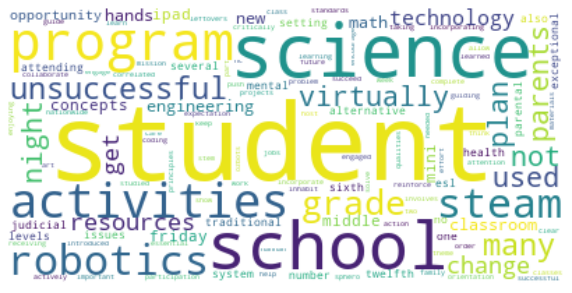

------------------------------------------------------------------------------------------------------------------------


In [0]:
dbs_opt=5
dbscan_opt = DBSCAN(eps=20, min_samples=minPts, n_jobs=-1).fit(X_5K_Feat)

def Cluster_Seperation(lbl,i_val):
  c = []
  c.append(essays[i])
  return c

essays = X_Tr_Es_DS['essay'].values
Clstr=[]
for j in range(dbs_opt):
  for i in range(dbscan_opt.labels_.shape[0]):
    if dbscan_opt.labels_[i] == j:
      clstr_val=Cluster_Seperation(dbscan_opt.labels_,i)
      Clstr.append(Clstr)
      if(i == j):
        break;
  words=''
  for i in clstr_val:
    words+=str(i)

  print(f"Word Cloud for Cluster:{j+1}")
  wordcloud = WordCloud(background_color="white",stopwords = stopwords,min_font_size = 5,random_state=0,repeat=False).generate(words)
  # Display the generated image:
  plt.close()
  plt.figure(figsize = (10, 10), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("--"*60) 

<h1>3. Conclusions</h1>
<br> Compare to the "Agglomerative and DBSCAN".KMean took lot of time and Space complexity.<br> When epsilon value not selected propely model could failed to work(I.e., Hyperparmeter are highly senstive).Hence epsilon and minpoint needs to be select very carefully.